In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

## Set up the transitionmatrix

In [2]:
transition_matrix: np.array = np.array(
    [ [1/2, 1/4, 1/5],
      [1/3, 1/2, 2/5],
      [1/6, 1/4, 2/5] ]
)
transition_matrix

array([[0.5       , 0.25      , 0.2       ],
       [0.33333333, 0.5       , 0.4       ],
       [0.16666667, 0.25      , 0.4       ]])

# Task 1.1

In [3]:
today = transition_matrix[0, :]
day_after_tomorrow = np.round(np.dot(np.dot(transition_matrix, transition_matrix), np.array([1, 0, 0])),3)

In [4]:
print(f"Probability of Day after tomorrow being Sunny is:{day_after_tomorrow[0]} (11/30)")
print(f"Probability of Day after tomorrow being Overcast is:{day_after_tomorrow[1]} (2/5)")
print(f"Probability of Day after tomorrow being Rainy is:{day_after_tomorrow[2]} (7/30)")

Probability of Day after tomorrow being Sunny is:0.367 (11/30)
Probability of Day after tomorrow being Overcast is:0.4 (2/5)
Probability of Day after tomorrow being Rainy is:0.233 (7/30)


# Task 1.2

In [5]:
# Finding the eigen values and eigen vectors for the matrix P
eigs, eigen=np.linalg.eig(transition_matrix) #Every column is a eigen vector in eigen variable

# For a stochastic matrix, the invariant measure is the eigenvector corresponding to eigenvalue 1
inv_meas=eigen[:,0]/(np.sum(eigen[:,0])) # Dividing it is necessary to have the probabilities sum up to 1

print(f"Invariant Measure for the given transition matrix is: {inv_meas}")
# We separate the invariant measure to be used in the next question
inv_sunny, inv_overcast, inv_rainy = inv_meas

Invariant Measure for the given transition matrix is: [0.31578947 0.42105263 0.26315789]


# Task 1.3
The following numerical decoding will be used

0 = sunny
1 = overcast
2 = rainy

The transition matrix P is constructed such that: P(ij)=P(tomorrow=i|today=j).

In [6]:
number_simulations: int = 190
number_simulated_days: int = 30 + 1  # +1 since day 0 is always sunny and day one is at position [1]

initial_trajectories: np.array = np.zeros((number_simulations, number_simulated_days)).astype(int)
initial_trajectories.shape

(190, 31)

In [7]:
def sim_step(x: np.array) -> int:
    """
    Produce one step in the simulation given x as the array of weather states in [0, 1, 2]
    this function is applied on each element of the array x and will calculate the weahter for the next day using the transition probabilites given in
    Transition matrix
    :param x: [0|1|2]
    :return: 0|1|2
    """
    # get the transition probabilities for the given weather today
    probs: np.array = np.array(transition_matrix[:, x])
    return np.random.choice([0, 1, 2],p=probs)

### Vectorize the sim step to apply it to each element of a vector

In [8]:
vectorized_step  = np.vectorize(sim_step)

### Produce the simulation

In [9]:
trajectories: np.array = initial_trajectories

for i in range(1, number_simulated_days):
    trajectories[:, i] = vectorized_step(trajectories[:, i-1])

In [10]:
trajectories

array([[0, 1, 2, ..., 1, 2, 1],
       [0, 2, 2, ..., 1, 1, 0],
       [0, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

In [11]:
def plot_hist(days: List[np.array]):
    # for comparison
    invariant_measure: List [float] = [round(6/19, 4), round(8/19, 4), round(5/19, 4)]

    fig, axes = plt.subplots(1, 4)
    fig.set_size_inches(18.5, 6)
    x = ["Sunny", "Overcast", "Rainy"]
    titles = ["2", "3", "30"]
    for day, ax, title in zip(days, axes, titles):
        count_0: np.array = np.count_nonzero(day == 0) # Sunny
        count_1: np.array = np.count_nonzero(day == 1) # overcast
        count_2: np.array = np.count_nonzero(day == 2) # rainy

        p_0: float = round(count_0/len(day), 4)
        p_1: float = round(count_1/len(day), 4)
        p_2: float = round(count_2/len(day), 4)

        y = [p_0, p_1, p_2]
        ax.bar(x, y)
        ax.set_title(f"Distribution after {title} Days")
        for i in range(3):
            ax.text(i, y[i], y[i], ha = 'center')

    # set the invariant measure
    axes[3].bar(x, invariant_measure)
    axes[3].set_title("Invariant Measure")
    for i in range(3):
        plt.text(i, invariant_measure[i], invariant_measure[i], ha = 'center')

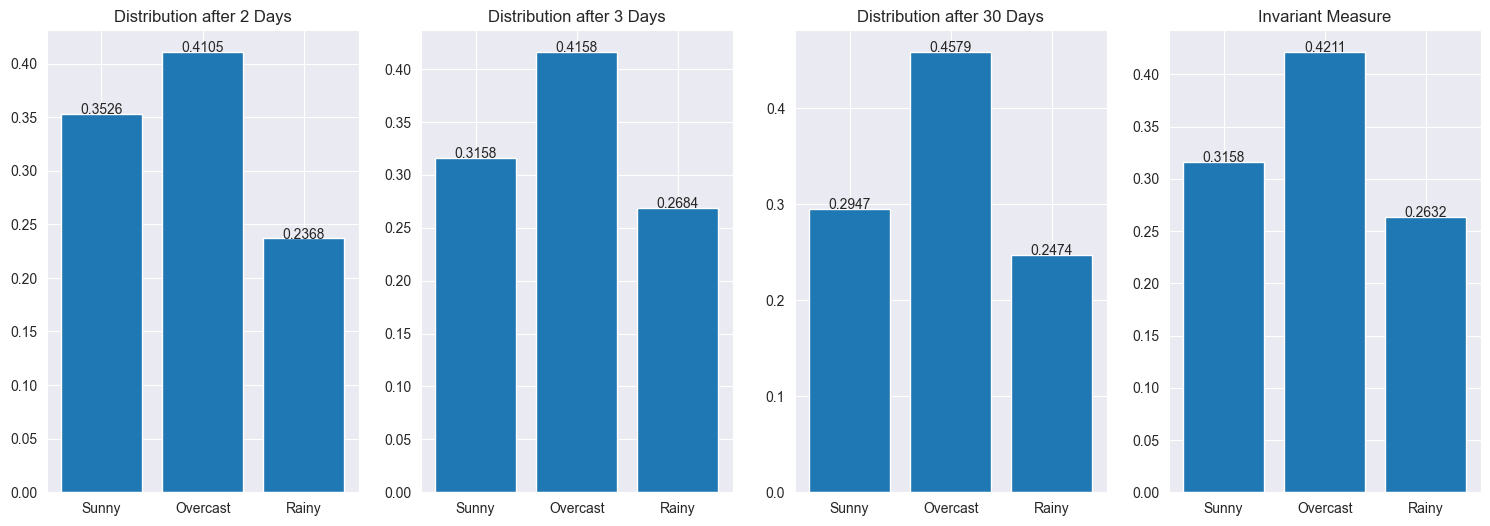

In [12]:
day_2: np.array = trajectories[:, 2]
day_3: np.array = trajectories[:, 3]
day_30: np.array = trajectories[:, 30]
plot_hist(days=[day_2, day_3, day_30])

We have found that the invariant measure $p$ is, given the probability of the event $"rainy"$, $p_r$: $p=\begin{pmatrix}6/5p_r \\ 8/5p_r \\ p_r\end{pmatrix}$. <br>
We notice that, for $t=30$, $p_s\approx 6/5*p_r$, $p_o\approx 8/5*p_r$:

Then it seems that there is convergence to the invariant measure.

# Task 1.4 <br>
The invariant measure, $p\in[0,1]^3$, is the eigenvector of $P$ for $\lambda_1=1$. <br>
$\begin{align}det(P-\lambda I)=-\lambda^3+7/5\lambda^2-13/30\lambda+1/30=0 \iff \lambda=1 \vee \lambda=1/30(6+\sqrt{6})\vee \lambda=1/30(6-\sqrt{6}),\end{align}$
then the other eigenvalues of $P$ are $\lambda_2=1/30(6+\sqrt{6}), \ \lambda_3=1/30(6+\sqrt{6})$. We notice that they are both <1, which is in line with theory since a stochastic matrix has eigenvalues 1 and the others less than 1 in module. Let be $v_2, \ v_3$ the eigenvectors corresponding to $\lambda_2$ and $\lambda_3$. <br>
Proving that the chain converges to the invariant measure means showing that:
$\begin{align}\lim_{t\to\infty} Pp_t=\lim_{t\to\infty}P^tp_1=p,\end{align}$
where $p_t$ is the distribution of $X_t$ and $p_1$ is the initial distribution. <br>
Since $p,v_2,v_3$ form a basis of $[0,1]^3$ we have:
$\begin{align}\exists \alpha,\beta,\gamma\in\mathbb{R} | \ p_1=\alpha p+\beta v_2+ \gamma v_3.\end{align}$
Now we observe that $\forall i\in\{2,3\}$ $<v_i,(1,1,1)>=0$: <br>
$Pv_i=\lambda_i v_i\iff <Pv_i,(1,1,1)>=\lambda_i<v_i,(1,1,1)>\iff\lambda_i<v_i,(1,1,1)>=\sum_{j=1}^3 {v_i}_j  (\sum_{k=1}^3 P_{kj})=<v_i,(1,1,1)>\iff <v_i,(1,1,1)>=0$,<br>
where we have used that $P$ is stochastic and that $\lambda_i<1$ (from which follows the conclusion).<br>
$p_1$ is a probability measure as well as $p$, then: 
$1=\sum_{i=1}^3{p_1}_i=<p_1,(1,1,1)>=\alpha<p,(1,1,1)>+\beta<v_2,(1,1,1)>+\gamma<v_3,(1,1,1)>=\alpha \iff \alpha=1$.<br>
Consequently:
$\begin{align}\lim_{t\to\infty}P^tp_1&=\lim_{t\to\infty}(P^tp+\beta P^tv_2+\gamma P^tv_3)=\\
&=\lim_{t\to\infty}(\lambda_1^t p+\beta \lambda_2^tv_2+\gamma \lambda_3^t v_3)=p,\end{align}$
given that $\lambda_1^t=1^t\to 1 \text{ if } t\to\infty$, while $\lambda_2,\lambda_3<1$, then  $\lambda_i^t\to 0 \text{ if } t\to\infty, \ i\in\{2,3\}$. Moreover the other quantities don't depend on t.

# Task 1.5 Version 1

For this task we implemented two versions to approach the problem.
for both we consider:
s = sunny
o = overcast
r = rainy

given the information, that on day two there is no sun, we can follow, that it is either rainy or overcast on day 2.
We know, that yesterday (simulation start) the weather was sunny. So we have the conditional probabilities for:

o on day 2 given s on day 1 = P(o|s) = 1/3
r on day 2 given s on day 1 = P(r|s) = 1/6
s on day 2 given s on day 1 = P(s|s) = 1/2

since we know that on day 2 it is not sunny, we conclude the probability for sunny on day 2 is 0

However, we can distribute the probability from p(s|s) proportionally to P(o|s) and P(r|s) by:

P(r|s) = P(r|s)/P(s|s) = 1/3
P(o|s) = P(r|s)/P(s|s) = 2/3

This allows us to have P(r|s) + P(o|s) = 1

In version one, we use the simulation of day 2 and count all sunny, overcast and rainy days. Hover we distribute the sunny days proportionally to overcast(2/3) and rainy(1/3) and then calculate the probabilities for rain and overcast.

In [13]:
count_sunny_day_2: np.array = np.count_nonzero(day_2 == 0)
count_overcast_day_2: np.array = np.count_nonzero(day_2 == 1) + count_sunny_day_2 * (2/3)
count_count_rainy_day_2: np.array = np.count_nonzero(day_2 == 2) + count_sunny_day_2 * (1/3)

p_rainy: float = count_count_rainy_day_2 / len(day_2)
p_overc: float = count_overcast_day_2 / len(day_2)

print(f"P: Rainy    = {p_rainy}")
print(f"P: Overcast = {p_overc}")

P: Rainy    = 0.3543859649122807
P: Overcast = 0.6456140350877192


## Task 1.5 Version 2

Given the information we can compute the probability of rain at day 2 by considering the results of the simulation excluding all the events $\{X_2="sunny"\}$.

In [14]:
p_rainy2: float = np.sum(day_2 == 2) / np.sum(day_2 != 0)
p_overcast2: float = np.sum(day_2 == 1) / np.sum(day_2 != 0)

print(f"P: Rainy    = {p_rainy2}")
print(f"P: Overcast = {p_overcast2}")

P: Rainy    = 0.36585365853658536
P: Overcast = 0.6341463414634146


If we compute the probability not empirically we get: <br>
Let be $E_1=\{X_1="sunny"\}$ (initial condition), $P_{E_1}(\cdot):=P(\cdot|E_1)$ and $I=\{X_2\neq"sunny"\}$, <br>
$P_{E_1}(X_2="rainy"|I)=\frac{P_{E_1}(X_2="rainy",I)}{P_{E_1}(I)}=\frac{P_{E_1}(X_2="rainy")}{1/3+1/6}=9/2*1/6=1/3\approx 0.33$, <br>
then, since $P_{E_1}(X_2="sunny"|I)=0$, we have $P_{E_1}(X_2="overcast"|I)=1-1/3=2/3$.

# Task 1.6

In [15]:
#Empirical distribution of day 3:
empirical_dist_day_3 = {"sunny": np.sum(day_3 == 0) / len(day_3), "overcast": np.sum(day_3 == 1) / len(day_3), "rainy": np.sum(day_3 == 2) / len(day_3)}

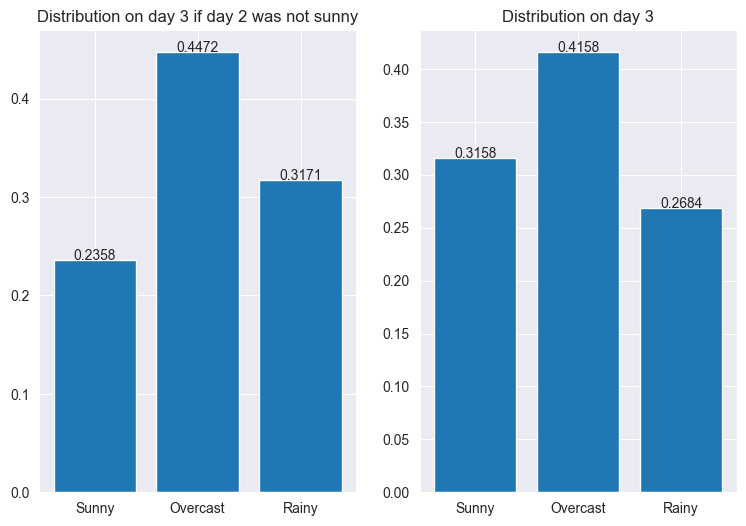

In [16]:
def plot_hist_no_sun(d_2: np.array, d_3: np.array):
    x = ["Sunny", "Overcast", "Rainy"]
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(9, 6)

    count_0: np.array = np.count_nonzero(d_3[d_2 != 0] == 0)
    count_1: np.array = np.count_nonzero(d_3[d_2 != 0] == 1)
    count_2: np.array = np.count_nonzero(d_3[d_2 != 0] == 2)

    p_0: float = round(count_0/(count_0 + count_1 + count_2), 4)
    p_1: float = round(count_1/(count_0 + count_1 + count_2), 4)
    p_2: float = round(count_2/(count_0 + count_1 + count_2), 4)


    y = [p_0, p_1, p_2]
    axes[0].bar(x, y)
    axes[0].set_title("Distribution on day 3 if day 2 was not sunny")
    for i in range(3):
        axes[0].text(i, y[i], y[i], ha = 'center')

    y = [round(empirical_dist_day_3["sunny"], 4), round(empirical_dist_day_3["overcast"], 4), round(empirical_dist_day_3["rainy"], 4)]
    axes[1].bar(x, y)
    axes[1].set_title("Distribution on day 3")
    for i in range(3):
        axes[1].text(i, y[i], y[i], ha = 'center')

plot_hist_no_sun(day_2, day_3)

We notice that the probability of the event $\{X_3="sunny"\}$ has decreased.

# Task 1.7

Given $E_1=\{X_1="sunny"\}$ and introducing the event $I=\{\text{the information of the agent is true}\}$, that has probability 1/2 we get that the distribution of $X_2$ is: <br>
$P_{E_1}(X_2=rainy)=P_{E_1}(X_2=rainy|I)P(I)+P_{E_1}(X_2=rainy|I)P(I^c)=1/2*1/3+1/2*1/6=1/4$ and similarly we get $P_{E_1}(X_2=overcast)=1/2$, $P_{E_1}(X_2=sunny)=1/4$, then the distribution of $X_3$ is: $P\begin{pmatrix}1/4 \\ 1/2 \\ 1/4\end{pmatrix}$

In [17]:
print("Theorical distribution of X_3:", np.dot(transition_matrix, np.array([1/4,1/2,1/4])))

Theorical distribution of X_3: [0.3        0.43333333 0.26666667]


In [18]:
p_3_7 = 1/2 * np.array(list(empirical_dist_day_3.values())) + 1/2 * np.array(list(empirical_dist_day_3.values()))
print("Empirical distribution of X_3:", p_3_7)

Empirical distribution of X_3: [0.31578947 0.41578947 0.26842105]
